In [1]:
from Portefeuille import Portfeuille
from PM_strategy import CRP,BHP
import seaborn as sns
import numpy as np 
import pandas as pd
import datetime
import matplotlib.pyplot as plt

SYMBOLS = ['ETHBTC','XRPBTC','EOSBTC','LTCBTC','ZECBTC','ETCBTC','XMRBTC']
START = datetime.datetime(2017,8,1)
END = datetime.datetime(2020,4,1)
Port = Portfeuille(SYMBOLS,START,END)


ETHBTC    0.079361
XRPBTC    0.000053
EOSBTC    0.000530
LTCBTC    0.013556
ZECBTC    0.061797
ETCBTC    0.004502
XMRBTC    0.015000
Name: 2017-08-08 00:00:00, dtype: float64


In [2]:
y = CRP(Port.df_normalized,START,END)
CRP_cum_return = np.cumprod(y) - 1
y2= BHP(Port.df_normalized,START,END)
HBP_cum_return = np.cumprod(y2) - 1
x = pd.date_range(start=START,end=END,freq='30min')

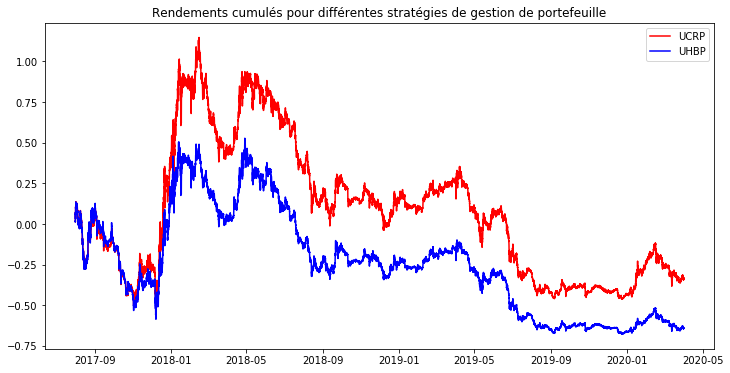

In [7]:
plt.figure(figsize=(12,6))
sns.lineplot(x=x,y=CRP_cum_return,color = 'red')
sns.lineplot(x=x,y=HBP_cum_return,color = 'blue')
plt.legend(('UCRP','UHBP'),loc='upper right')
plt.title('Rendements cumulés pour différentes stratégies de gestion de portefeuille')
plt.show()

In [9]:
from universal import tools
from universal import algos

In [3]:
algo = algos.OLMAR(window=5, eps=10)

In [4]:
result = algo.run(Port.df_close)
result.fee = 0.002

Summary:
    Profit factor: 1.48
    Sharpe ratio: 14.66
    Information ratio (wrt UCRP): 18.76
    UCRP sharpe: -0.23
    Beta / Alpha: 1.10 / 23.563%
    Annualized return: 755023571.33%
    Annualized volatility: 108.31%
    Longest drawdown: 13 days
    Max drawdown: 28.19%
    Winning days: 57.6%
    Turnover: 55011.4
        


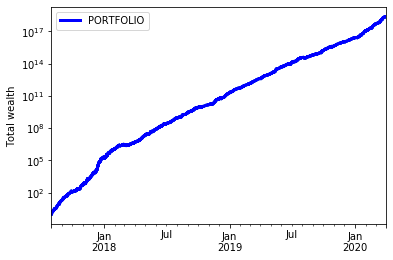

In [11]:
print(result.summary())
result.plot(weights=False, assets=False, ucrp=False, logy=True)

In [10]:
etats = np.array([(Port.df_close.shift(-1) / Port.df_close).fillna(1).values,(Port.df_high.shift(-1) / Port.df_high).fillna(1).values,(Port.df_low.shift(-1) / Port.df_low).fillna(1).values],dtype='float')

In [11]:
etats

array([[[0.99721285, 1.00515464, 0.99489278, ..., 1.00153671,
         0.99389783, 1.        ],
        [0.99124526, 1.00564103, 1.00529797, ..., 0.97589784,
         1.        , 0.98876325],
        [1.00013822, 0.98487166, 0.98366612, ..., 0.99903372,
         0.99616016, 1.02101351],
        ...,
        [0.99869823, 0.9937523 , 0.99788681, ..., 1.        ,
         1.        , 0.9967776 ],
        [1.00980014, 1.0114645 , 1.01015317, ..., 1.0024985 ,
         1.00168831, 1.        ],
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ]],

       [[1.01054645, 1.01265174, 0.99869146, ..., 1.00307343,
         1.0075688 , 1.00063385],
        [0.99464662, 0.99881817, 0.99247816, ..., 0.99687216,
         0.98606949, 1.00893863],
        [0.98348646, 0.99475997, 0.99584386, ..., 0.99679831,
         1.00694045, 0.99881409],
        ...,
        [1.00019257, 0.99963249, 0.99939243, ..., 1.        ,
         1.        , 1.00279445],
        [1.0

In [ ]:
(self.df_open.shift(-1) / self.df_open).fillna(1)

In [15]:
#def states(self,portefeuille,window_size)
portefeuille = Port
state = []
window_size = 48
df = np.array([portefeuille.df_close.values,portefeuille.df_high.values,portefeuille.df_low.values], dtype='float')
for j in range(portefeuille.idx_depart -1, len(df[0])):
    temp = np.copy(df[:, j-window_size+1:j+1 , :])
    for feature in range(df.shape[0]):
        for k in range(portefeuille.num_symbols):
            if temp[feature,-1,k] == 0:
                temp[feature,:,k] /= temp[feature,-2,k]
            else:
                temp[feature,:,k] /= temp[feature,-1,k]
    state.append(temp)

(3, 46753, 7)


In [10]:
state[0][0].shape

(48, 7)

In [12]:
state[0].shape

(4, 48, 7)

In [2]:
Port.idx_depart

336

In [22]:
len(df[0])

46753

In [2]:
import pickle
import pandas as pd

In [4]:
Port = pd.read_pickle('Model/Resultat/Portfolio_train_2019-08-01_2020-04-01_ETHBTC-XRPBTC-EOSBTC-LTCBTC-ZECBTC-ETCBTC-XMRBTC_1.2175786321402244.pickle')

In [48]:
import numpy as np
np.mean(np.array(Port.returns) -1)/np.std(np.array(Port.returns) -1),np.mean(np.array(Port.returns))/np.std(np.array(Port.returns))

(0.006721863990545552, 288.5821324506472)

In [41]:
df = pd.DataFrame(Port.weights,columns=['BTC'] + Port.symbols)

In [53]:
np.mean(np.log(np.array(Port.returns)))

1.730369682774003e-05

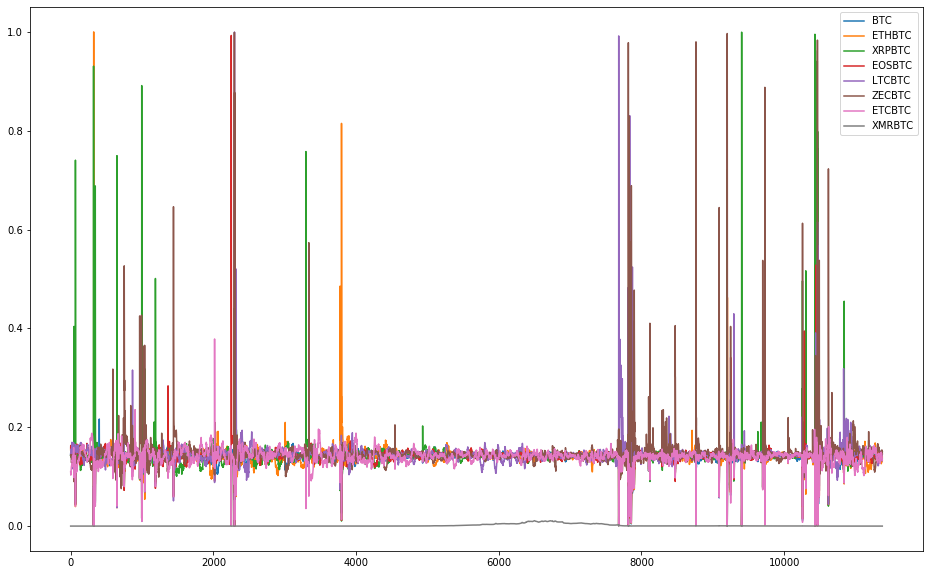

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
for col in df.columns:
    sns.lineplot(x=range(len(df)),y=df[col].values)
plt.legend(df.columns,loc='upper right')

In [19]:
df.describe()

,BTC,ETHBTC,XRPBTC,EOSBTC,LTCBTC,ZECBTC,ETCBTC,XMRBTC
count,11376.000000,11376.000000,11376.000000,11376.000000,11376.000000,11376.000000,11376.000000,1.137600e+04
mean,0.140201,0.140931,0.142842,0.141677,0.145130,0.146842,0.141210,1.167052e-03
std,0.011759,0.018710,0.031827,0.016359,0.024701,0.036527,0.015174,2.356900e-03
min,0.000003,0.000002,0.000030,0.000002,0.000003,0.000011,0.000002,8.299912e-10
25%,0.137975,0.137576,0.137911,0.138487,0.139267,0.138581,0.135736,1.484544e-05
50%,0.141642,0.142250,0.142122,0.142590,0.144099,0.144011,0.142244,1.566165e-04
75%,0.144860,0.146132,0.145949,0.146252,0.148931,0.149734,0.147732,5.040965e-04
max,0.216679,0.999860,0.999350,0.992730,0.999564,0.998941,0.378581,1.094209e-02


In [20]:
1/7

0.14285714285714285

In [40]:
mode = 'train'
ep = 1
if not (mode == 'train' and ep ==1):
    print('here')

In [1]:
from Portefeuille import Portfeuille
import datetime
SYMBOLS = ['ETHBTC','XRPBTC','EOSBTC','LTCBTC','ZECBTC','ETCBTC','XMRBTC']
START = datetime.datetime(2019,8,1)
END = datetime.datetime(2019,9,30)
PM = Portfeuille(SYMBOLS,START, END,'BTCUSD')

,ETHBTC,XRPBTC,EOSBTC,LTCBTC,ZECBTC,ETCBTC,XMRBTC
2019-08-01 00:00:00,0.021592,0.000032,0.000437,0.009805,0.006722,0.000600,0.008008
2019-08-01 00:30:00,0.021534,0.000032,0.000436,0.009734,0.006722,0.000599,0.008116
2019-08-01 01:00:00,0.021495,0.000032,0.000436,0.009736,0.006722,0.000599,0.008005
2019-08-01 01:30:00,0.021304,0.000032,0.000435,0.009695,0.006722,0.000595,0.008073
2019-08-01 02:00:00,0.021315,0.000032,0.000435,0.009675,0.006690,0.000595,0.008070
...,...,...,...,...,...,...,...
2019-09-29 22:00:00,0.021138,0.000030,0.000347,0.006771,0.004715,0.000566,0.006933
2019-09-29 22:30:00,0.021092,0.000030,0.000346,0.006710,0.004698,0.000566,0.006958
2019-09-29 23:00:00,0.021068,0.000030,0.000346,0.006695,0.004676,0.000566,0.006950
2019-09-29 23:30:00,0.021015,0.000030,0.000345,0.006684,0.004692,0.000566,0.006950


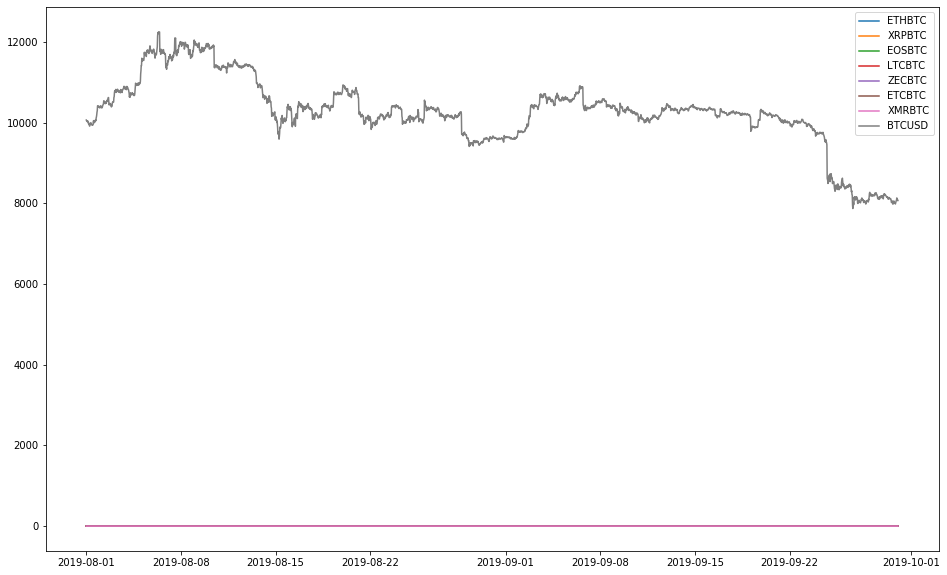

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
for col in SYMBOLS:
    sns.lineplot(x=PM.df_close.index,y=PM.df_close[col].values)
sns.lineplot(x=PM.df_close.index,y=cash.close.values)
plt.legend(SYMBOLS+['BTCUSD'],loc='upper right')

In [26]:
import pandas as pd
from datetime import timedelta
cash = pd.read_csv('Data/BTCUSD.csv')

In [27]:
cash.time = pd.to_datetime(cash.time)

In [28]:
cash = cash[(cash.time <= END) & (cash.time >= START)]

In [29]:
cash

,time,open,close,high,low,volume
35040,2019-08-01 00:00:00,10087.989695,10066.000000,10167.000000,10063.407650,422.111012
35041,2019-08-01 00:30:00,10066.000000,10048.211494,10084.000000,10046.000000,43.673640
35042,2019-08-01 01:00:00,10048.937075,10033.108692,10071.847847,10004.000000,137.117485
35043,2019-08-01 01:30:00,10034.000000,10033.000000,10041.000000,9992.100000,127.977434
35044,2019-08-01 02:00:00,10032.979997,10029.944455,10041.124294,9999.944744,57.444062
...,...,...,...,...,...,...
37916,2019-09-29 22:00:00,8078.700000,8134.829475,8159.500000,8060.400000,100.786927
37917,2019-09-29 22:30:00,8136.000000,8120.300000,8163.761110,8102.500000,135.064550
37918,2019-09-29 23:00:00,8120.300000,8095.264407,8134.800000,8067.700000,126.574526
37919,2019-09-29 23:30:00,8095.200000,8090.000000,8099.400000,8089.900000,18.681414


In [21]:
PM.df_close[col]

2019-08-01 00:00:00    0.008008
2019-08-01 00:30:00    0.008116
2019-08-01 01:00:00    0.008005
2019-08-01 01:30:00    0.008073
2019-08-01 02:00:00    0.008070
                         ...   
2019-09-29 22:00:00    0.006933
2019-09-29 22:30:00    0.006958
2019-09-29 23:00:00    0.006950
2019-09-29 23:30:00    0.006950
2019-09-30 00:00:00    0.006968
Name: XMRBTC, Length: 2881, dtype: float64

In [34]:
import os
os.mkdir('test')

In [36]:
if os.exists('Test'):
    print('fu')